<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/main/Datathon_Code_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 탐색 및 이해


This is a historical dataset on the modern Olympic Games, including all the Games **from Athens 1896 to Rio 2016**. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.



* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA


## 1-1. 라이브러리 불러오기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1-2. 데이터 로드

In [ ]:
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

## 1-3. 기본 정보 확인: 데이터 구성, 결측치 등

In [ ]:
print(athlete_events.info())
athlete_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
print(noc_regions.info())
noc_regions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB
None


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
noc_regions.isnull().sum()

,0
NOC,0
region,3
notes,209


### noc_regions['region']의 결측치 3개 처리

In [ ]:
# noc_regions의 region 결측치 확인: 'TUV', 'ROT', 'UNK'
noc_regions[noc_regions['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [ ]:
# 두 데이터셋의 공통 컬럼인 NOC 에서 noc_regions['region']의 결측치 NOC == 'TUV'가 있는지 확인
athlete_events[athlete_events['NOC'] == 'TUV']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
132436,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN
148612,74540,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
148613,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN
172492,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN
240317,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN
240342,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN


In [ ]:
# '투발루'로 확인, 결측치 처리
noc_regions.loc[noc_regions['NOC'] == 'TUV', 'region'] = 'Tuvalu'

In [ ]:
# 두 데이터셋의 공통 컬럼인 NOC 에서 noc_regions['region']의 결측치 NOC == 'ROT'가 있는지 확인
athlete_events[athlete_events['NOC'] == 'ROT']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
141669,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN
141753,71113,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN
149306,74902,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN


In [ ]:
# 'Refugee Olympic Athletes'(올림픽 난민 선수단)로 확인, 결측치 처리
noc_regions.loc[noc_regions['NOC'] == 'ROT', 'region'] = 'Refugee Olympic Athletes'

In [ ]:
# 두 데이터셋의 공통 컬럼인 NOC 에서 noc_regions['region']의 결측치 NOC == 'UNK'가 있는지 확인
athlete_events[athlete_events['NOC'] == 'UNK']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


In [ ]:
# 2개의 행 모두 대부분의 컬럼이 결측치로 이루어짐, athlete_events에서 2개 행 drop
athlete_events = athlete_events[athlete_events['NOC'] != 'UNK']

## 1-4. 데이터 합치기 및 분포 시각화

### NOC 를 기준으로 데이터 merge

In [ ]:
athlete_events_df = athlete_events.merge(noc_regions, on='NOC', how='left')

In [ ]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
print(athlete_events_df.info())
athlete_events_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271114 entries, 0 to 271113
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271114 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271114 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271114 non-null  object 
 7   NOC     271114 non-null  object 
 8   Games   271114 non-null  object 
 9   Year    271114 non-null  int64  
 10  Season  271114 non-null  object 
 11  City    271114 non-null  object 
 12  Sport   271114 non-null  object 
 13  Event   271114 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270765 non-null  object 
 16  notes   5037 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB
None


,ID,Age,Height,Weight,Year
count,271114.000000,261642.000000,210945.000000,208241.000000,271114.000000
mean,68249.099696,25.556898,175.338970,70.702393,1978.378970
std,39022.365447,6.393561,10.518462,14.348020,29.877198
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.500000,24.000000,175.000000,70.000000,1988.000000
75%,102097.750000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### 데이터 분포 시각화

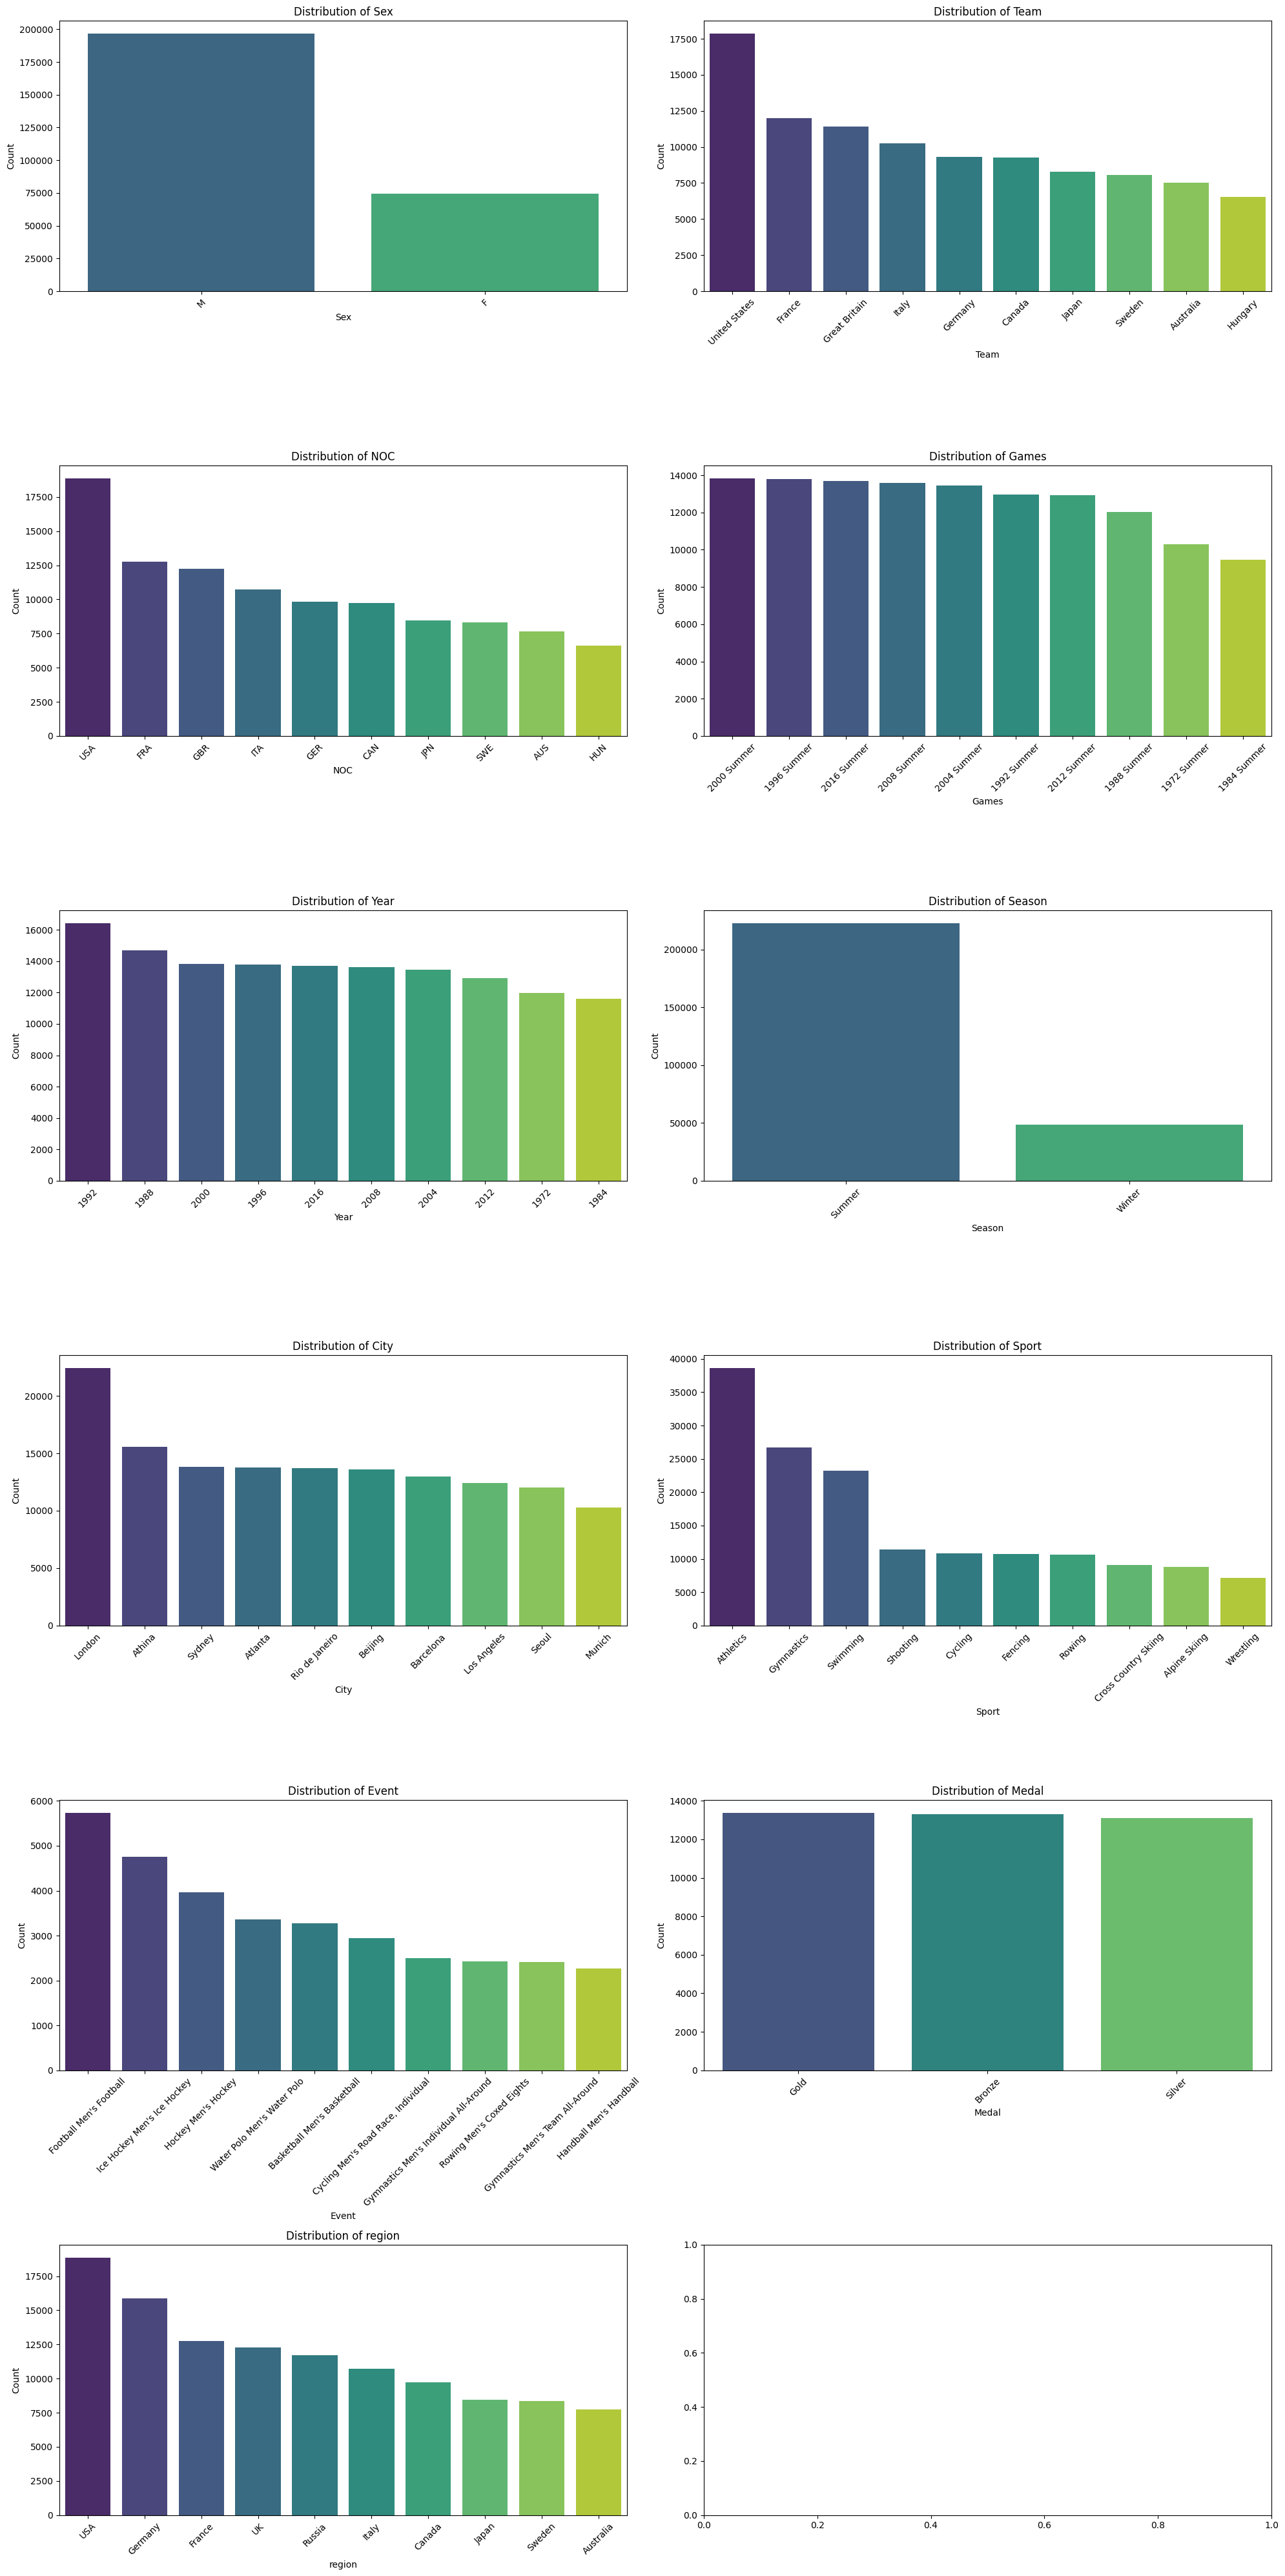

In [ ]:
columns = ['Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region']

# 서브플롯으로 분포 시각화
fig, axes = plt.subplots(6, 2, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(columns):
    if i < len(axes):
        sns.countplot(data=athlete_events_df, x=col, ax=axes[i], palette='viridis', order=athlete_events_df[col].value_counts().index[:10])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# 서브플롯 간격 조정
plt.tight_layout()
plt.show()


전체 데이터 분포에 따르면,

- 나이 평균 25.5
- 신장 평균 175.3
- 체중 평균 70.7
- 여성보다 남성 출전 비율 2배 이상 높음
- 데이터 개수 상위 국가: USA, France, Great Britain, Italy, Germany,  Canada, Japan, Sweden, Austrailia, Hungary
- 동계보다 하계 올림픽 데이터가 더 많다: 하계 올림픽이 더 많은 종목이 있기 때문일 것
- 육상, 체조, 수영 종목이 데이터가 많다: 종목의 변경 등으로 인해 오래된 종목에 대한 데이터가 많을 것



# 2. 결측치 처리

In [ ]:
athlete_events_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9472
Height,60169
Weight,62873
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# 남아있는 region 결측치 확인
athlete_events_df[athlete_events_df['region'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268750,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268751,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268991,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,NaN
268992,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,NaN


In [ ]:
# region 결측치 고유값 확인
athlete_events_df[athlete_events_df['region'].isnull()]['NOC'].unique()

array(['SGP'], dtype=object)

In [ ]:
# 'Singapore'로 입력
athlete_events_df.loc[athlete_events_df['NOC'] == 'SGP', 'region'] = 'Singapore'

In [ ]:
athlete_events_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9472
Height,60169
Weight,62873
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# Age, Height, Weight 결측치는 이상치에 대한 영향이 적은 중앙값으로 대체
athlete_events_df['Age'].fillna(athlete_events_df['Age'].median(), inplace=True)
athlete_events_df['Height'].fillna(athlete_events_df['Height'].median(), inplace=True)
athlete_events_df['Weight'].fillna(athlete_events_df['Weight'].median(), inplace=True)

In [ ]:
# Medal, notes 결측치는 'NONE'으로 대체
athlete_events_df['Medal'].fillna('NONE', inplace=True)
athlete_events_df['notes'].fillna('NONE', inplace=True)

In [ ]:
# 결측치 제거 확인
athlete_events_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


# 3. 이상치 탐색 및 처리

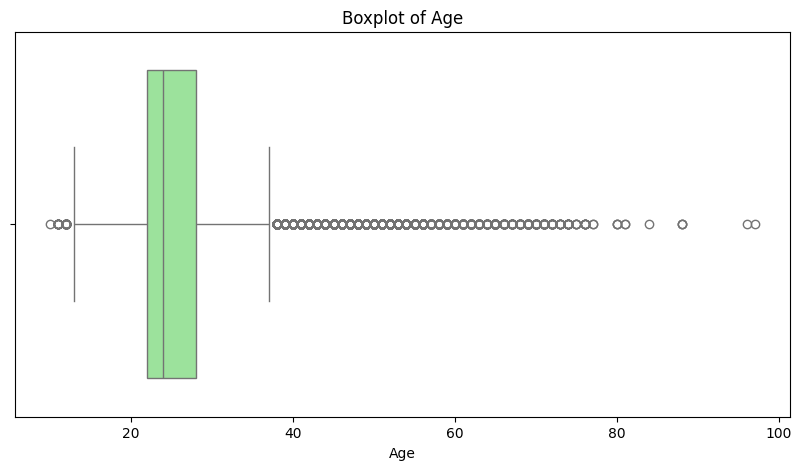

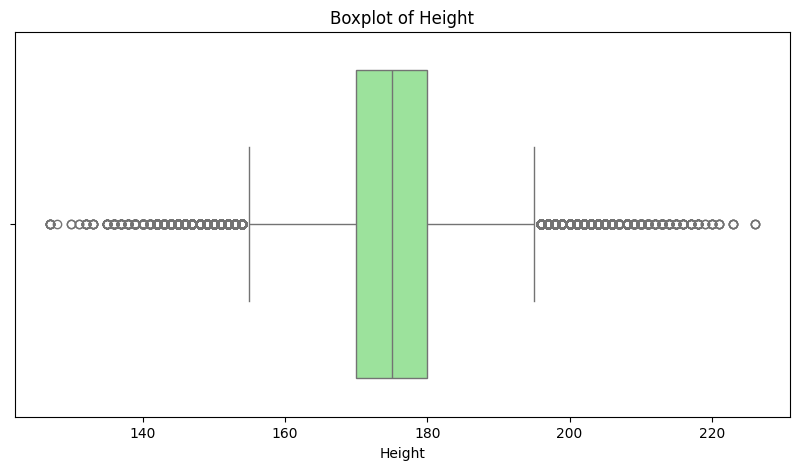

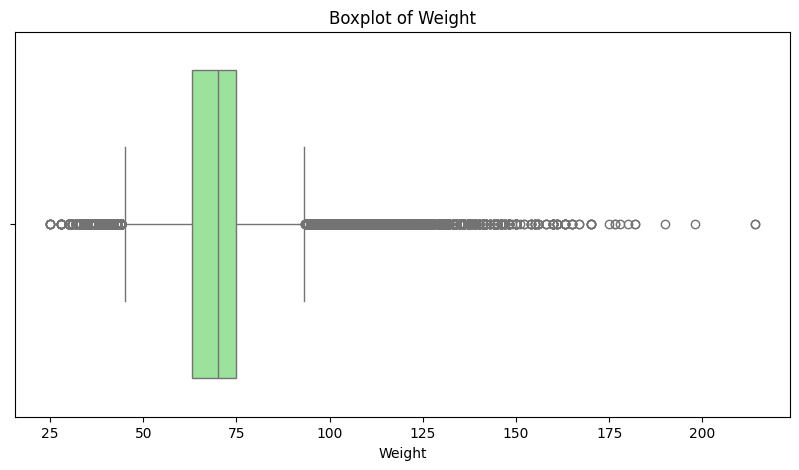

In [ ]:
numeric_columns= ['Age', 'Height', 'Weight']
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=athlete_events_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()//////><

시대적, 선수 개인의 특성의 다양성을 고려하여 이상치 처리는 하지 않았다.

In [ ]:
# 나이 16세 미만 또는 30세 이상인 행 필터링
age_outliers = athlete_events_df[(athlete_events_df['Age'] < 16) | (athlete_events_df['Age'] > 50)]
print("나이 이상치:")
print(age_outliers)

# 신장 기준으로 이상치 필터링 (예를 들어, 200cm 이상)
height_outliers = athlete_events_df[athlete_events_df['Height'] > 200]
print("\n신장 이상치:")
print(height_outliers)

# 체중 기준으로 이상치 필터링 (예를 들어, 100kg 이상)
weight_outliers = athlete_events_df[athlete_events_df['Weight'] > 100]
print("\n체중 이상치:")
print(weight_outliers)

나이 이상치:
            ID                                       Name Sex   Age  Height  \
58          19                      Win Valdemar Aaltonen   M  54.0   175.0   
128         46                                 Hans Aasns   M  53.0   194.0   
129         46                                 Hans Aasns   M  57.0   194.0   
265        137                  Giordano Giulio Abbondati   M  15.0   175.0   
295        159  Reem Wa'il Abdalazem Abdalazem El-Bossaty   F  15.0   167.0   
...        ...                                        ...  ..   ...     ...   
270197  135173                           Henri Achille Zo   M  58.0   175.0   
270198  135173                           Henri Achille Zo   M  58.0   175.0   
270854  135462                      Bernadette Zurbriggen   F  15.0   173.0   
270855  135462                      Bernadette Zurbriggen   F  15.0   173.0   
270856  135462                      Bernadette Zurbriggen   F  15.0   173.0   

        Weight         Team  NOC        Gam

# 4. EDA

In [ ]:
#개최연도 도시 동계 하계 구분
tmp = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

In [ ]:
# 샘플 다섯개 보기
df.head(5)

,Year,City,Season,Athlets
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101


### 동계/ 하계별 참가자 수 추이

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
import os
from PIL import Image
pio.renderers.default = "colab"

# 연도별 동계하계 올림픽 선수 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines"
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines"
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets2')

In [ ]:
#막대 그래프 만들기, 도시 추가
tmp = athlete_events_df.groupby('Year')['City'].value_counts()
df2 = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df2 = df2.merge(df)

In [ ]:
iplot(ff.create_table(df2.head(3)), filename='jupyter-table2')

In [ ]:
#막대 그래프 변형
traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City'],

)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets4')

- 1924년도 이후부터 동계/하계 올림픽이 시작됨
- 1994년도 이후부터는 2년 간격으로 올림픽이 개최됨(번갈아서)
- 1956년 여름 올림픽에는 참가자 수가 적음 (WW)
- 전반적으로 올림픽 참가자 숫자는 늘어나고 있는 추세
- 동계보다 **하계 참여자 수가 대부분 더 많음**

### 동계/ 하계별 종목 개수 추이

In [ ]:
#종목을 살펴보자
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].nunique()
df = pd.DataFrame(data={'Sports': tmp.values}, index=tmp.index).reset_index()

In [ ]:
# 동계하계올림픽 종목 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Sports'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= dfS['City'],
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Sports'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='blue',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Sports per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of sports'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

동계보다 하계 올림픽의 종목수가 더 많음



> 따라서 편파판정의 가능성이 더 많고, 데이터의 양이 더 많은 **하계 올림픽에 집중**하여 편파판정의 가능성을 분석해보기로 결정했다.






### 국가별 하계 올림픽 참가 횟수

In [ ]:
# 하계 올림픽 데이터만 필터링
summer_olympics_df = athlete_events_df[athlete_events_df['Season'] == 'Summer']

# 국가별 하계 올림픽 참가 횟수 계산
tmp = summer_olympics_df.groupby('region')['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()

# 결과 출력
print(df.head(5))

           region  Editions
0     Afghanistan        14
1         Albania         8
2         Algeria        13
3  American Samoa         8
4         Andorra        11


In [ ]:
# 국가별 하계올림픽 참가 횟수
# Choropleth trace 생성
trace = go.Choropleth(
            locations=df['region'],
            locationmode='country names',
            z=df['Editions'],
            text=df['region'],
            autocolorscale=False,
            reversescale=True,
            colorscale='rainbow',
            marker=dict(
                line=dict(
                    color='rgb(0,0,0)',
                    width=0.5)
            ),
            colorbar=dict(
                title='Editions',
                tickprefix='')
        )

data = [trace]
layout = go.Layout(
    title='Total Participation in Summer Olympics by Country',
    geo=dict(
        showframe=True,
        showlakes=False,
        showcoastlines=True,
        projection=dict(
            type='natural earth'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

### 종목별 하계 올림픽 참가자 수

In [ ]:
# 종목별 참가자 수
tmp = summer_olympics_df.groupby(['Year', 'City', 'Season'])['Sport'].value_counts()
df = pd.DataFrame(data={'Athletes': tmp.values}, index=tmp.index).reset_index()

# 결과 출력
print(df.head(3))

   Year    City  Season       Sport  Athletes
0  1896  Athina  Summer   Athletics       106
1  1896  Athina  Summer  Gymnastics        97
2  1896  Athina  Summer    Shooting        65


In [ ]:
sports = (athlete_events_df.groupby(['Sport'])['Sport'].nunique()).index

In [ ]:
def draw_trace(dataset, sport):
    dfS = dataset[dataset['Sport']==sport];
    trace = go.Box(
        x = dfS['Athletes'],
        name=sport,
         marker=dict(
                    line=dict(
                        color='black',
                        width=0.8),
                ),
        text=dfS['City'],
        orientation = 'h'
    )
    return trace


def draw_group(dataset, title,height=800):
    data = list()
    for sport in sports:
        data.append(draw_trace(dataset, sport))


    layout = dict(title = title,
              xaxis = dict(title = 'Number of athlets',showticklabels=True),
              yaxis = dict(title = 'Sport', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=8,
                color='black'),),
              hovermode = 'closest',
              showlegend=False,
                  width=800,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='events-sports1')

# select only Summer Olympics
df_S = df[df['Season']=='Summer']
# draw the boxplots for the Summer Olympics
draw_group(df_S, "Athlets per Sport (Summer Olympics)")

### 하계 올림픽 총 메달 수

In [ ]:
#올림픽 회차별 메달 수
tmp = summer_olympics_df.groupby(['Year', 'City', 'Season', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

# 금, 은, 동 메달 데이터 분리
dfG = df[df['Medal'] == 'Gold']
dfS = df[df['Medal'] == 'Silver']
dfB = df[df['Medal'] == 'Bronze']

In [ ]:
traceG = go.Bar(
    x = dfG['Year'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['City']+ " (" + dfG['Season'] + ")",
)
traceS = go.Bar(
    x = dfS['Year'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']+ " (" + dfS['Season'] + ")",
)

traceB = go.Bar(
    x = dfB['Year'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['City']+ " (" + dfB['Season'] + ")",
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True),
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

### 하계 올림픽 종목별 메달 수

In [ ]:
#종목별 메달 수
tmp = summer_olympics_df.groupby(['Sport', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

In [ ]:
traceG = go.Bar(
    x = dfG['Sport'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['Sport'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['Sport'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['Sport'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['Sport'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['Sport'],
   # orientation = 'h'
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per sport',
          xaxis = dict(title = 'Sport', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),),
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=900,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

### 메달이 많은 종목인 육상, 수영, 조정을 중심으로 분석 진행

In [ ]:
#금메달 보유자 나이, 신장, 체중 평균

# 금메달 보유자 필터링
gold_medalists = athlete_events_df[athlete_events_df['Medal'] == 'Gold']

# 육상, 수영, 로잉 종목만 필터링
sports = ['Athletics', 'Swimming', 'Rowing']
gold_medalists_filtered = gold_medalists[gold_medalists['Sport'].isin(sports)]

# 종목별로 나이, 신장, 체중에 대한 describe 출력
for sport in sports:
    sport_data = gold_medalists_filtered[gold_medalists_filtered['Sport'] == sport]
    print(f"{sport} 종목 금메달 보유자 통계 요약:")
    print(sport_data[['Age', 'Height', 'Weight']].describe(), '\n')

Athletics 종목 금메달 보유자 통계 요약:
               Age       Height       Weight
count  1339.000000  1339.000000  1339.000000
mean     25.003734   177.819268    71.722928
std       3.944020     9.053745    15.438852
min      15.000000   150.000000    40.000000
25%      22.000000   171.000000    61.000000
50%      24.000000   178.000000    70.000000
75%      28.000000   185.000000    79.000000
max      41.000000   207.000000   142.000000 

Swimming 종목 금메달 보유자 통계 요약:
               Age       Height       Weight
count  1099.000000  1099.000000  1099.000000
mean     20.794359   180.691538    73.343494
std       3.543321     9.279825    10.994185
min      13.000000   157.000000    48.000000
25%      18.000000   175.000000    66.000000
50%      21.000000   180.000000    70.000000
75%      23.000000   188.000000    81.000000
max      35.000000   206.000000   114.000000 

Rowing 종목 금메달 보유자 통계 요약:
              Age      Height      Weight
count  978.000000  978.000000  978.000000
mean    25.295501  182

In [ ]:
#금메달 국가
gold_count_countries = (gold_medalists[gold_medalists.Year > 1992]
                        .loc[:,['region','Year']].groupby(['region','Year']).size().reset_index(name='Medal')
                        .sort_values(by=['Year','Medal'],ascending=[True,False])
                        .groupby(['Year']).head(5)
                        )


countries = gold_count_countries['region'].unique()
years = gold_count_countries['Year'].unique()

In [ ]:
top_countries_over_years = (gold_medalists.loc[:,['Year','region','Sport']].groupby(['Year','region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Year','Sport', 'Medal'], ascending=[True,True, False])
                 .groupby(['Year','Sport']).first().reset_index()
)

wl_gym_box = (top_countries_over_years[(top_countries_over_years.Sport == 'Athletics')
                                       | (top_countries_over_years.Sport == 'Swimming')
                                       | (top_countries_over_years.Sport == 'Rowing')]
              )

In [ ]:
#육상, 수영, 로잉별 금메달 보유자의 나이, 신장, 체중 평균

# 육상, 수영, 로잉에 대한 금메달 보유자 필터링
sports = ['Athletics', 'Swimming', 'Rowing']
gold_medal_data = athlete_events_df[(athlete_events_df['Sport'].isin(sports)) & (athlete_events_df['Medal'] == 'Gold')]

# 각 스포츠별로 금메달 보유자들의 나이, 신장, 체중 평균 계산
avg_stats = gold_medal_data.groupby('Sport')[['Age', 'Height', 'Weight']].mean().reset_index()

# 결과 출력
print(avg_stats)

       Sport        Age      Height     Weight
0  Athletics  25.003734  177.819268  71.722928
1     Rowing  25.295501  182.574642  78.827198
2   Swimming  20.794359  180.691538  73.343494


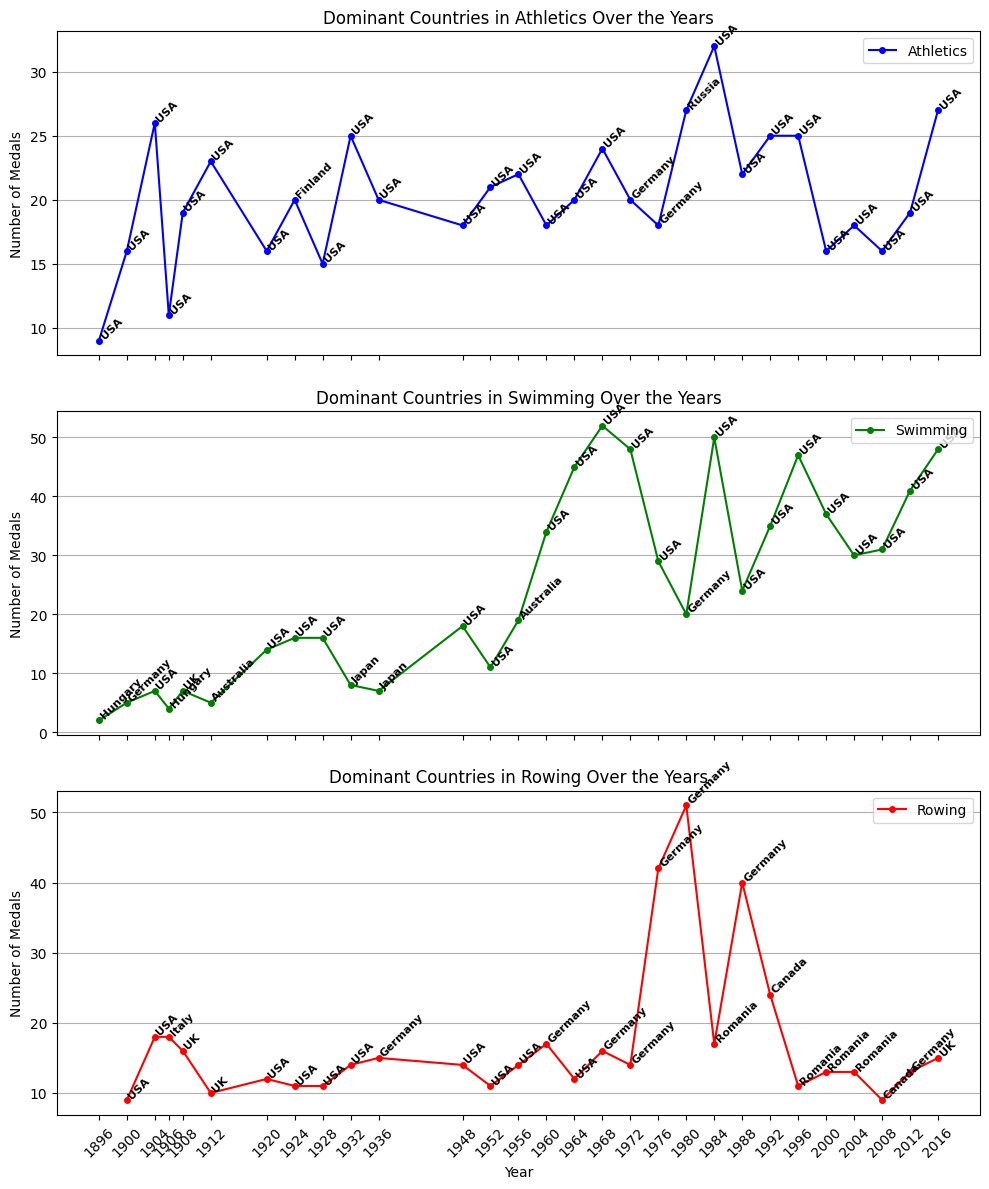

In [ ]:
#연도별 육상, 수영, 로잉의 최강 국가
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

colors = {'Athletics': 'blue', 'Swimming': 'green', 'Rowing': 'red'}

for ax, sport in zip(axes, wl_gym_box['Sport'].unique()):
    sport_data = wl_gym_box[wl_gym_box['Sport'] == sport]
    ax.plot(sport_data['Year'], sport_data['Medal'], marker='o',markersize=4, color=colors[sport], label=sport)

    # Annotate the plot with country names
    for i in range(len(sport_data)):
        ax.text(sport_data.iloc[i]['Year'], sport_data.iloc[i]['Medal'], sport_data.iloc[i]['region'],
                fontsize=8, verticalalignment='bottom',rotation= 45,fontweight='bold')

    ax.set_ylabel('Number of Medals')
    ax.set_title(f'Dominant Countries in {sport} Over the Years')
    ax.legend()
    ax.grid(True, axis='y')

plt.xlabel('Year')
plt.xticks(wl_gym_box['Year'].unique(), rotation=45)
plt.tight_layout()

plt.show()



>** 육상**
- 전체 참가자 38624명으로 올림픽 총 참가 선수 중
육상 선수 비율은 17.4%
- 금메달 1339개 은메달 1334개 동메달 1296개, 일회 최다 참가자 2508명 최저 참가자 106명




- 1924년 파리 올림픽: 핀란드. 한 선수가 금메달 5개 획득(파보 누르미)
- 1972년 뮌헨 올림픽: 독일. 서독(독일)의 홈 어드밴티지와 동독과 경쟁 관계
- 1980년 모스크바 올림픽: 러시아. 도핑(금지약물), 서방 국가 보이콧(미국 서독 캐나다), 홈어드밴티지



> **수영**
- 전체 참가자 23195명으로 올림픽 총 참가 선수 중 수영 선수 비율은 10.4%
- 금메달 1099개 은메달 1993개 동메달 956개, 일회 최다 참가자 1749명 최저 참가자 18명




- 1932년 LA 올림픽: 일본. 1928 올림픽 이후 국제 경험이 풍부한 선수들 집중 육성
- 1956년 멜버른 올림픽: 호주. 홈 어드밴티지. 2명의 스타 수영 선수(던 프레이저, 머레이 로즈)
- 1980년 모스크바 올림픽: 독일. 도핑(유럽권에서 사용, 금지약물), 서방 국가 보이콧(미국 서독 캐나다)





> **조정**
- 전체 참가자 10595명으로 올림픽 총 참가 선수 중
조정 선수 비율은 4.76%
- 금메달 978개 은메달 977개 동메달 990개, 일회 최다 참가자 661명 최저 참가자 46명


- 1980년 몬트리올 올림픽: 독일. 도핑(금지약물). 8인조 4인조 경기에서 두각
- 1984년 LA 올림픽: 루마니아. 동독과 소련을 비롯한 동구권 국가 보이콧.










# 5. 결론

금메달 수의 변화로 편파판정 여부를 확인할 수 있을거라고 생각했으나,

한 나라가 1등을 할 만한 다른 요인들(홈어드벤티지, 전략의 변화 등)이 많아 해당 논리만으로 편파 판정을 구분해내는 데에는 어려움이 있다.


> 편파판정은 금메달의 숫자보다도 정치적/사회적 배경이 생각보다 많이 고려되므로 그러한 요인을 같이 분석해야 의미있는 결과값을 얻을 수 있을것 같다.